<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

# Setup and Data    

In [5]:
import pandas as pd
import numpy as np

schedule = pd.read_csv("/Users/anton/Downloads/Oklahoma_City_Thunder/schedule.csv")
draft_schedule = pd.read_csv("/Users/anton/Downloads/Oklahoma_City_Thunder/schedule_24_partial.csv")
locations = pd.read_csv("/Users/anton/Downloads/Oklahoma_City_Thunder/locations.csv")
game_data = pd.read_csv("/Users/anton/Downloads/Oklahoma_City_Thunder/team_game_data.csv")

In [24]:
schedule.head()

,season,gamedate,team,opponent,home,win
0,2014,2015-04-15,SAC,LAL,0,1
1,2014,2015-04-15,NYK,DET,1,0
2,2014,2015-04-15,DEN,GSW,0,0
3,2014,2015-04-15,MIA,PHI,0,1
4,2014,2015-04-15,UTA,HOU,0,0


In [26]:
draft_schedule.head()

,season,gamedate,team,opponent,home,win
0,2024,2025-04-13,DEN,HOU,0,1
1,2024,2025-04-13,OKC,NOP,0,1
2,2024,2025-04-11,OKC,UTA,0,1
3,2024,2025-04-11,DEN,MEM,1,1
4,2024,2025-04-09,OKC,PHX,0,1


In [28]:
locations.head()

,team,latitude,longitude,timezone
0,ATL,33.757233,-84.396340,Eastern
1,BOS,42.366310,-71.062226,Eastern
2,BKN,40.682657,-73.975282,Eastern
3,CHA,35.225186,-80.839336,Eastern
4,CHI,41.880629,-87.674048,Central


In [30]:
game_data.head()

,season,gametype,nbagameid,gamedate,offensivenbateamid,off_team_name,off_team,off_home,off_win,defensivenbateamid,...,turnovers,blocksagainst,defensivefouls,offensivefouls,shootingfoulsdrawn,possessions,points,shotattempts,andones,shotattemptpoints
0,2016,2,21600495,2016-12-30,1610612740,New Orleans Pelicans,NOP,1,1,1610612752,...,13,6,17,1,9,101,104,91,3,102
1,2016,2,21600495,2016-12-30,1610612752,New York Knicks,NYK,0,0,1610612740,...,14,5,11,1,9,99,92,100,2,92
2,2021,2,22100943,2022-03-03,1610612742,Dallas Mavericks,DAL,1,1,1610612744,...,10,5,16,0,11,90,122,90,6,120
3,2021,2,22100943,2022-03-03,1610612744,Golden State Warriors,GSW,0,0,1610612742,...,15,1,16,3,6,90,113,86,1,112
4,2016,2,21601032,2017-03-18,1610612741,Chicago Bulls,CHI,1,1,1610612762,...,11,8,11,0,6,88,95,84,2,92


## Part 1 -- Schedule Analysis               

**QUESTION:** How many times are the Thunder scheduled to play 4 games in 6 nights in the provided 80-game draft of the 2024-25 season schedule? (Note: clarification, the stretches can overlap, the question is really “How many games are the 4th game played over the past 6 nights?”)     

 

In [55]:
# filter OKC games, sort, and convert to list to loop easier
okc_games = draft_schedule[(draft_schedule['team'] == 'OKC') & (draft_schedule['season'] == 2024)].copy()
okc_games['date'] = pd.to_datetime(okc_games['gamedate']).dt.normalize()
okc_games = okc_games.sort_values('date').reset_index(drop=True)
okc_game_dates = okc_games['date'].tolist()

In [57]:
print(okc_games.head())

   season    gamedate team opponent  home  win       date
0    2024  2024-10-24  OKC      DEN     0    1 2024-10-24
1    2024  2024-10-26  OKC      CHI     0    1 2024-10-26
2    2024  2024-10-27  OKC      ATL     1    1 2024-10-27
3    2024  2024-10-30  OKC      SAS     1    1 2024-10-30
4    2024  2024-11-01  OKC      POR     0    1 2024-11-01


In [65]:
# Find every game that is the 4th one played within the last 6 nights
qualifying_games_indices = []
for i in range(len(okc_game_dates)):
    current_date = okc_game_dates[i]
    window_start_date = current_date - pd.Timedelta(days=5)

    #Count how many OKC games inside [window_start_date, current_date]
    games_in_window = sum(window_start_date <= d <= current_date for d in okc_game_dates)
    if games_in_window == 4:
        qualifying_games_indices.append(i)

qualifying_games = okc_games.iloc[qualifying_games_indices]

In [67]:
print("OKC 4th game in past 6 nights (count):", len(qualifying_games))
print()
print(qualifying_games[['gamedate', 'team', 'opponent', 'home']])

OKC 4th game in past 6 nights (count): 26

      gamedate team opponent  home
6   2024-11-04  OKC      ORL     1
7   2024-11-06  OKC      DEN     0
10  2024-11-11  OKC      LAC     1
11  2024-11-13  OKC      NOP     1
12  2024-11-15  OKC      PHX     1
15  2024-11-20  OKC      POR     1
29  2024-12-31  OKC      MIN     1
30  2025-01-02  OKC      LAC     1
31  2025-01-03  OKC      NYK     1
32  2025-01-05  OKC      BOS     1
38  2025-01-17  OKC      DAL     0
39  2025-01-19  OKC      BKN     1
48  2025-02-08  OKC      MEM     0
49  2025-02-10  OKC      NOP     1
50  2025-02-12  OKC      MIA     1
51  2025-02-13  OKC      MIN     0
55  2025-02-26  OKC      BKN     0
56  2025-02-28  OKC      ATL     0
58  2025-03-03  OKC      HOU     1
59  2025-03-05  OKC      MEM     0
60  2025-03-07  OKC      POR     1
62  2025-03-10  OKC      DEN     1
63  2025-03-12  OKC      BOS     0
77  2025-04-09  OKC      PHX     0
78  2025-04-11  OKC      UTA     0
79  2025-04-13  OKC      NOP     0


**QUESTION:** From 2014-15 to 2023-24, what is the average number of 4-in-6 stretches for a team in a season? Adjust each team/season to per-82 games before taking your final average.   
  


In [70]:
def q2_league_avg_4in6(schedule_df):
    # copy so no touch on original
    s = schedule_df.copy()
    s["gamedate"] = pd.to_datetime(s["gamedate"]).dt.normalize()
    out = []
    
    for (t,yr), g in s.groupby(["team","season"]):
        d = g["gamedate"].sort_values().to_numpy(dtype="datetime64[D]").astype("int64")
        if len(d)==0: continue

        # for each game day D, find the first index with date >= D-5
        starts = np.searchsorted(d, d - 5)
        counts = np.arange(len(d)) - starts + 1
        c4 = int((counts==4).sum())
        out.append({"team":t,"season":yr,"games":len(d),"fourth_in_six_per82":c4*82/len(d)})
        
    ts = pd.DataFrame(out)
    overall = ts["fourth_in_six_per82"].mean()
    by_season = ts.groupby("season",as_index=False)["fourth_in_six_per82"].mean().rename(
        columns={"fourth_in_six_per82":"avg_per_team_per_82"}).sort_values("season")
    
    print(f"Average per team-season (per-82): {overall:.2f}\n")
    print(by_season.to_string(index=False))
    return ts, by_season, overall

team_season_4in6, season_avg_4in6, overall_avg_4in6 = q2_league_avg_4in6(schedule)

Average per team-season (per-82): 25.10

 season  avg_per_team_per_82
   2014            29.600000
   2015            28.000000
   2016            27.866667
   2017            20.366667
   2018            19.500000
   2019            20.627533
   2020            33.938889
   2021            23.800000
   2022            23.833333
   2023            23.466667


**QUESTION:** Which of the 30 NBA teams has had the highest average number of 4-in-6 stretches between 2014-15 and 2023-24? Which team has had the lowest average? Adjust each team/season to per-82 games.     


In [215]:
import contextlib, io

with contextlib.redirect_stdout(io.StringIO()):
    team_season_summary_df, _, _ = q2_league_avg_4in6(schedule)

team_avg_per82_df = (
    team_season_summary_df
    .groupby("team", as_index=False)["fourth_in_six_per82"]
    .mean()
    .rename(columns={"fourth_in_six_per82": "avg_4in6_per82"})
    .sort_values("avg_4in6_per82", ascending=False)
)

max_avg = team_avg_per82_df["avg_4in6_per82"].max()
min_avg = team_avg_per82_df["avg_4in6_per82"].min()

teams_highest_df = team_avg_per82_df[team_avg_per82_df["avg_4in6_per82"].eq(max_avg)].copy()
teams_lowest_df  = team_avg_per82_df[team_avg_per82_df["avg_4in6_per82"].eq(min_avg)].copy()

print("Most average 4-in-6 (per-82), 2014-15 to 2023-24:")
print(teams_highest_df.assign(avg_4in6_per82=lambda d: d["avg_4in6_per82"].round(2)).to_string(index=False))

print("\nFewest average 4-in-6 (per-82), 2014-15 to 2023-24:")
print(teams_lowest_df.assign(avg_4in6_per82=lambda d: d["avg_4in6_per82"].round(2)).to_string(index=False))

print("\nFull team ranking (desc):")
print(team_avg_per82_df.assign(avg_4in6_per82=lambda d: d["avg_4in6_per82"].round(2)).to_string(index=False))

Most average 4-in-6 (per-82), 2014-15 to 2023-24:
team  avg_4in6_per82
 CHA           28.11

Fewest average 4-in-6 (per-82), 2014-15 to 2023-24:
team  avg_4in6_per82
 NYK           22.19

Full team ranking (desc):
team  avg_4in6_per82
 CHA           28.11
 CHI           28.05
 POR           26.93
 DET           26.53
 LAC           26.45
 WAS           26.42
 ATL           26.32
 IND           26.25
 OKC           26.15
 MEM           25.98
 UTA           25.75
 CLE           25.71
 MIN           25.62
 SAS           25.56
 GSW           25.34
 SAC           25.20
 BOS           25.19
 PHI           25.18
 TOR           24.81
 HOU           24.55
 MIL           24.34
 ORL           24.29
 DAL           23.69
 LAL           23.68
 MIA           23.56
 BKN           23.31
 DEN           22.87
 PHX           22.58
 NOP           22.40
 NYK           22.19


**QUESTION:** What was BKN's defensive eFG% in the 2023-24 season? What was their defensive eFG% that season in situations where their opponent was on the second night of back-to-back?  

In [151]:
def q5_bkn_def_efg(schedule_df, game_df, team="BKN", season=2023):
    s = schedule_df.copy()

    # use as datee
    s["gamedate"] = pd.to_datetime(s["gamedate"]).dt.normalize()
    s[["team","opponent"]] = s[["team","opponent"]].apply(lambda c: c.str.upper().str.strip())

    played = set(zip(s["team"], s["gamedate"]))
    one = pd.Timedelta(days=1)

    bkn_sched = s[(s["team"]==team) & (s["season"]==season)][["gamedate","opponent"]].copy()
    # if opponent playing yesterday
    bkn_sched["opp_on_second_of_b2b"] = bkn_sched.apply(
        lambda r: (r["opponent"], r["gamedate"]-one) in played, axis=1)
    # match game_df's team naming for merge
    bkn_sched = bkn_sched.rename(columns={"opponent":"off_team"})  # match game_df's team naming for merge

    g = game_df.copy()  # per-team per-game stats
    g["gamedate"] = pd.to_datetime(g["gamedate"]).dt.normalize()
    for c in ["off_team","def_team"]: g[c] = g[c].str.upper().str.strip()

    # keep regular season only
    if "gametype" in g.columns: g = g[g["gametype"]==2]  # keep regular season only
    g = g[(g["def_team"]==team) & (g["season"]==season)].copy()

    # eFG% allowed = opponent's (FGM + 0.5*3PM) / FGA, computed from offense rows
    g["opp_efg_num"] = g["fgmade"].astype(float) + 0.5*g["fg3made"].astype(float)

    # denominator
    g["opp_efg_den"] = g["fgattempted"].astype(float)

    # eFG% per game
    g["opp_efg_pct"] = g["opp_efg_num"]/g["opp_efg_den"]

    m = g.merge(bkn_sched, on=["gamedate","off_team"], how="left")

    # weighted mean helper (weights = FGA)
    w = lambda v,w: float((v*w).sum()/w.sum()) if w.sum() else np.nan

    # overall defensive eFG% allowed (weighted by FGA)
    overall = w(m["opp_efg_pct"], m["opp_efg_den"])

    # defensive eFG% vs opponents on 2nd of B2B
    b2b = w(m.loc[m["opp_on_second_of_b2b"]==True,"opp_efg_pct"],
            m.loc[m["opp_on_second_of_b2b"]==True,"opp_efg_den"])

    print("BKN defensive eFG% (2023–24):")
    print(f"Overall (weighted): {overall:.3%}")
    print(f"Opponent of B2B: {b2b:.3%}")
    print(f"Games: {len(m)}, \nB2B subset: {int((m['opp_on_second_of_b2b']==True).sum())}")
    return m

_ = q5_bkn_def_efg(schedule, game_data)

BKN defensive eFG% (2023–24):
Overall (weighted): 54.349%
Opponent of B2B: 53.491%
Games: 82, 
B2B subset: 16


## Comments
I flagged games where the opponent was on the 2nd night of a back-to-back (played the day before), then computed Nets defensive eFG% per game from the offense rows (BKN on defense) and compared FGA-weighted averages overall vs. that subset; note: the dataset didn’t provide an eFG% field, so I used the standard basketball definition. The formula applied is eFG% = (FGM + 0.5 × 3PM) / FGA.

[check] team_season_df.head():
team  season  games  b2b_per82  fourth_in_6_per82  avg_rest_days
 ATL    2014     82       21.0               32.0           2.07
 ATL    2015     82       19.0               30.0           2.09
 ATL    2016     82       18.0               29.0           2.06
 ATL    2017     82       15.0               21.0           2.15
 ATL    2018     82       12.0               21.0           2.16

[check] season_trends_df.head():
 season  avg_b2b_per82  avg_fourth_in_6_per82  avg_rest_days
   2014          19.33                  29.60           2.07
   2015          17.80                  28.00           2.08
   2016          16.37                  27.87           2.07
   2017          14.43                  20.37           2.16
   2018          13.27                  19.50           2.16


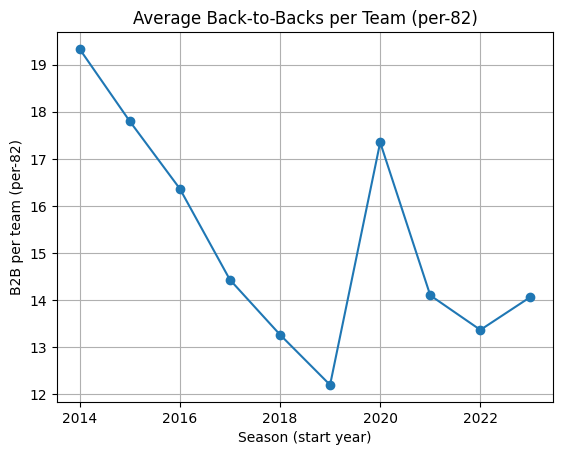

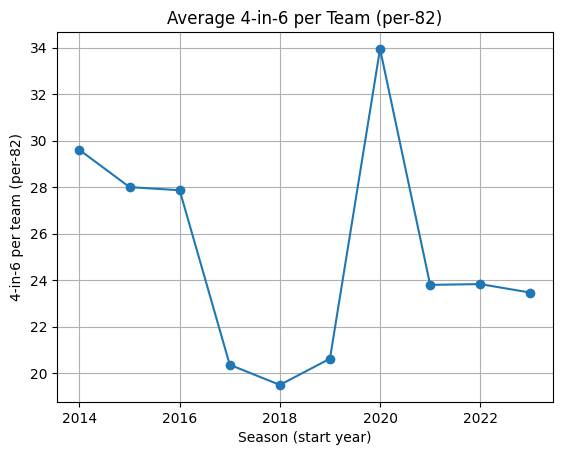


Compare:
       Metric  2014–2016 Avg  2021–2023 Avg
   B2B per-82          17.83          13.84
4-in-6 per-82          28.49          23.70
Avg rest days           2.07           2.12


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def q6_trends_with_plots(schedule_df):
    s = schedule_df.copy()
    
    s["gamedate"] = pd.to_datetime(s["gamedate"]).dt.normalize()
    s["team"] = s["team"].astype(str).str.upper().str.strip()
    s = s.dropna(subset=["gamedate", "team", "season"])

    # make sure its in numeric
    s["season"] = pd.to_numeric(s["season"], errors="coerce")
    s = s.dropna(subset=["season"])

    rows = []
    for (tm, yr), g in s.groupby(["team", "season"]):
        # sorted days as ints
        d = g["gamedate"].sort_values().to_numpy(dtype="datetime64[D]").astype("int64")
        n = len(d)
        if n == 0:
            continue

        # days between games
        gaps = np.diff(d)
        
        # back-to-back = 1-day gap
        b2b_count = int((gaps == 1).sum())
        
        # start of 6-night window [D-5, D]
        starts = np.searchsorted(d, d - 5)
        
        # games inside that window for each game
        counts = np.arange(n) - starts + 1

        # how many are the 4th in that span
        four_in_6 = int((counts == 4).sum())

        # normalize to per-82 to compare seasons
        per82 = lambda x: x * 82 / n
        rows.append({
            "team": tm,
            "season": int(yr),
            "games": n,
            "b2b_per82": per82(b2b_count),
            "fourth_in_6_per82": per82(four_in_6),
            "avg_rest_days": float(gaps.mean()) if len(gaps) else np.nan
        })

    team_season_df = pd.DataFrame(rows)

    # averages by season
    season_trends_df = (
        team_season_df
        .groupby("season", as_index=False)
        .agg(
            avg_b2b_per82=("b2b_per82", "mean"),
            avg_fourth_in_6_per82=("fourth_in_6_per82", "mean"),
            avg_rest_days=("avg_rest_days", "mean"),
        )
        .sort_values("season")
    )

    print("[check] team_season_df.head():")
    print(team_season_df.head().round(2).to_string(index=False))
    print("\n[check] season_trends_df.head():")
    print(season_trends_df.head().round(2).to_string(index=False))

    # 1st plot, average B2B per team per 82
    plt.figure()
    plt.plot(season_trends_df["season"], season_trends_df["avg_b2b_per82"], marker="o")
    plt.title("Average Back-to-Backs per Team (per-82)")
    plt.xlabel("Season (start year)")
    plt.ylabel("B2B per team (per-82)")
    plt.grid(True)
    plt.show()

    # 2nd plot, average 4th-in-6 per team per 82
    plt.figure()
    plt.plot(season_trends_df["season"], season_trends_df["avg_fourth_in_6_per82"], marker="o")
    plt.title("Average 4-in-6 per Team (per-82)")
    plt.xlabel("Season (start year)")
    plt.ylabel("4-in-6 per team (per-82)")
    plt.grid(True)
    plt.show()

    # comparison
    early = team_season_df[team_season_df["season"].between(2014, 2016)]
    late  = team_season_df[team_season_df["season"].between(2021, 2023)]
    era_compare = pd.DataFrame({
        "Metric": ["B2B per-82", "4-in-6 per-82", "Avg rest days"],
        "2014–2016 Avg": [early["b2b_per82"].mean(), early["fourth_in_6_per82"].mean(), early["avg_rest_days"].mean()],
        "2021–2023 Avg": [late["b2b_per82"].mean(),  late["fourth_in_6_per82"].mean(),  late["avg_rest_days"].mean()],
    }).round(2)
    print("\nCompare:")
    print(era_compare.to_string(index=False))

    return season_trends_df, team_season_df

season_trend, team_season_metrics = q6_trends_with_plots(schedule)

Trend #1, Fewer back-to-backs:
The “Average Back-to-Backs per Team (per-82)” line drops from ~19 (2014) toward ~13–14 by 2022–2023, with a temporary spike in 2020 from the compressed season. This means recent schedules are less compact, giving teams an extra day off more often.

Trend #2, Fewer “4th game in 6 nights:
The “Average 4-in-6 per Team (per-82)” line falls from ~29–30 to ~23–24 by 2018, again with a 2020 spike. Teams face dense 6 night stretches less frequently now than in the past.

And I also have the comparison, which has average rest days inch up a bit in the recent era.

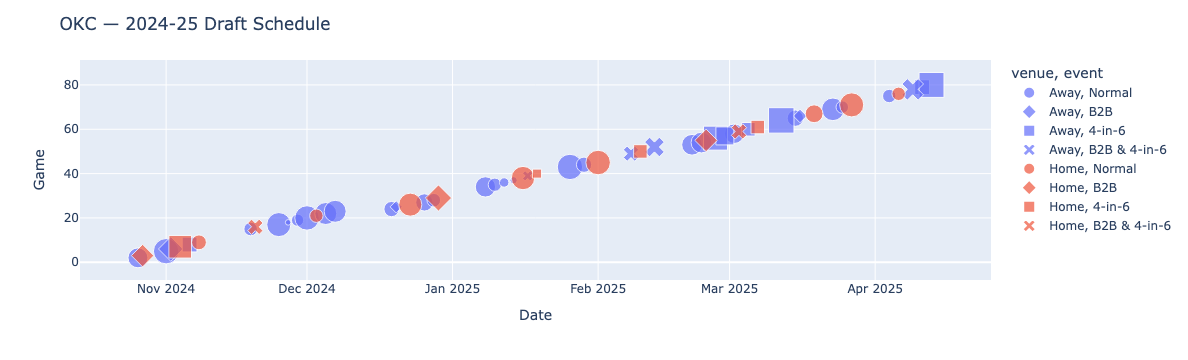

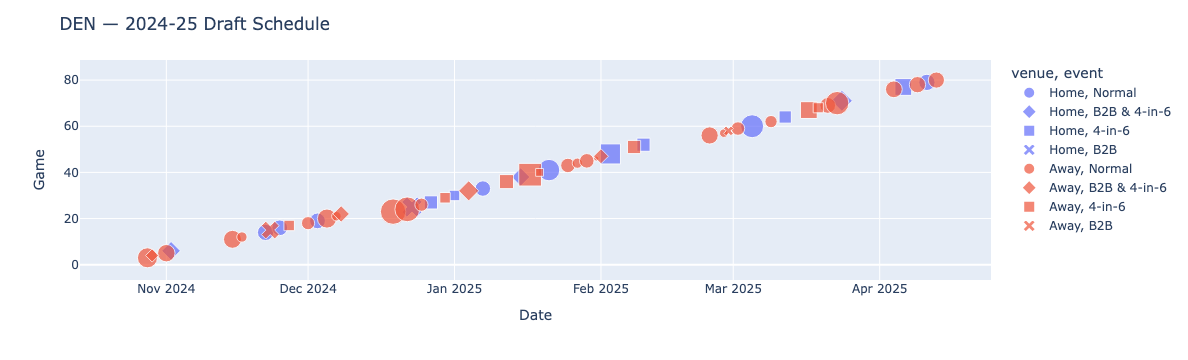

In [251]:
import numpy as np
import pandas as pd
import plotly.express as px

def q7_plot_team(draft_df, loc_df, team="OKC", season=2024):
    df = draft_df.copy()
    
    df["gamedate"] = pd.to_datetime(df["gamedate"]).dt.normalize()
    for c in ["team", "opponent"]:
        df[c] = df[c].astype(str).str.upper().str.strip()

    # keep only this team + season, in time order
    df = df[(df["team"] == team) & (df["season"] == season)].sort_values("gamedate").reset_index(drop=True)

    #label for plotting
    df["venue"] = df["home"].map({1: "Home", 0: "Away"})
    site_team = np.where(df["home"].eq(1), df["team"], df["opponent"])

    # pick latitude/longitude columns automatically from locations table
    lat_col = next((c for c in loc_df.columns if "lat" in c.lower()), None)
    lon_col = next((c for c in loc_df.columns if any(k in c.lower() for k in ["lon", "lng", "long"])), None)
    if lat_col is None or lon_col is None:
        raise ValueError("locations must have latitude and longitude columns (e.g., 'lat' and 'lon').")

    # map (lat, lon)
    loc_map = (
        loc_df.assign(team=lambda d: d["team"].astype(str).str.upper().str.strip())
              .set_index("team")[[lat_col, lon_col]]
              .rename(columns={lat_col: "lat", lon_col: "lon"})
              .to_dict("index")
    )
    df["lat"] = [loc_map.get(t, {}).get("lat", np.nan) for t in site_team]
    df["lon"] = [loc_map.get(t, {}).get("lon", np.nan) for t in site_team]

    # great-circle km from previous game site (0 for the first game)
    def hav(a, b, c, d):
        a, b, c, d = map(np.radians, [a, b, c, d])
        dl, da = d - b, c - a
        return 6371.0 * 2 * np.arcsin(np.sqrt(np.sin(da/2)**2 + np.cos(a) * np.cos(c) * np.sin(dl/2)**2))
        
    df["travel_km"] = hav(df["lat"].shift(1), df["lon"].shift(1), df["lat"], df["lon"]).fillna(0.0)

    # days since last game
    df["rest_days"] = (df["gamedate"] - df["gamedate"].shift(1)).dt.days
    
    # second night of a back-to-back
    df["is_b2b"] = df["rest_days"].eq(1)

    # fast integer dates
    d = df["gamedate"].to_numpy(dtype="datetime64[D]").astype("int64")

    # start of window [D-5, D]
    starts = np.searchsorted(d, d - 5)

    # games inside that window
    counts = np.arange(len(d)) - starts + 1
    df["is_4in6"] = counts == 4

    df["event"] = np.select(
        [df["is_b2b"] & df["is_4in6"], df["is_b2b"], df["is_4in6"]],
        ["B2B & 4-in-6", "B2B", "4-in-6"], default="Normal"
    )

    # y-axis: game number through the season
    df["game_no"] = np.arange(1, len(df) + 1)
    df["matchup"] = np.where(df["home"].eq(1), "vs " + df["opponent"], "@ " + df["opponent"])

    # date vs game #
    #colored by Home/Away, symbol by event, size by travel km
    fig = px.scatter(
        df,
        x="gamedate", y="game_no",
        color="venue", symbol="event", size="travel_km", size_max=18,
        hover_data={"gamedate": "|%Y-%m-%d", "matchup": True, "rest_days": True, "travel_km": ":.0f"}
    )
    fig.update_layout(title=f"{team} — {season}-25 Draft Schedule", xaxis_title="Date", yaxis_title="Game")
    fig.show()  # actually render the chart

    return df, fig

_ = q7_plot_team(draft_schedule, locations, team="OKC", season=2024)
_ = q7_plot_team(draft_schedule, locations, team="DEN", season=2024)

## Comments:
In this question, I first do the cleanning of the data and keep only one team and season, then decide where each game is played (home arena or the opponent’s arena) and attach that arena’s latitude/longitude. Using those coordinates, I compute travel between games with the haversine formula, which gives great-circle distance on Earth (R ≈ 6371 km). I also compute rest days by subtracting the previous game’s date and mark a back-to-back when rest_days equals 1. To find “4th game in 6 nights,” I slide a 6-day window [D-5, D] over the schedule and mark the game when the count inside the window reaches 4. Finally, we plot an interactive chart where date is on the x-axis, game number on the y-axis, color shows Home/Away, symbol shows B2B/4-in-6, and size shows travel distance.

## Part 3 -- Modeling     

**QUESTION:** Please estimate how many more/fewer regular season wins each team has had due to schedule-related factors from 2019-20 though 2023-24. Your final answer should have one number for each team, representing the total number of wins (not per 82, and not a per-season average). You may consider the on-court strength of the scheduled opponents as well as the impact of travel/schedule density. Please include the teams and estimates for the most helped and most hurt in the answer key.    

If you fit a model to help answer this question, please write a paragraph explaining your model, and include a simple model diagnostic (eg a printed summary of a regression, a variable importance plot, etc).    


- Most Helped by Schedule: ATL (99.1 or 0.991 wins)     
- Most Hurt by Schedule: LAC (-189 or -1.89 wins)    


In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score

SEASONS = list(range(2019, 2024))

# Same format which above answers, copy dataframe, conver to date-to-date
sched_df = schedule.copy()
sched_df["gamedate"] = pd.to_datetime(sched_df["gamedate"]).dt.normalize()
for c in ["team", "opponent"]:
    sched_df[c] = sched_df[c].astype(str).str.upper().str.strip()
#target
sched_df = sched_df[sched_df["season"].isin(SEASONS)].copy()

locs_df = locations.copy()
locs_df["team"] = locs_df["team"].astype(str).str.upper().str.strip()
# fast team -> {lat, lon, tz} lookup
arena_lookup = locs_df.set_index("team")[["latitude", "longitude", "timezone"]].to_dict(orient="index")

#schedule features, per team and per game
def site_lat_lon_tz(row):
    # pick arena owner, home game or away
    site_team = row["team"] if int(row["home"]) == 1 else row["opponent"]
    info = arena_lookup.get(site_team, {"latitude": np.nan, "longitude": np.nan, "timezone": "UNK"})
    return pd.Series([info["latitude"], info["longitude"], info["timezone"]])

# timezone, arena coords
sched_df[["site_lat", "site_lon", "site_tz"]] = sched_df.apply(site_lat_lon_tz, axis=1)

# previous game dates, latitude, longitude and timezone
sched_df = sched_df.sort_values(["team", "gamedate"])
sched_df["prev_date"] = sched_df.groupby("team")["gamedate"].shift(1)
sched_df["prev_lat"]  = sched_df.groupby("team")["site_lat"].shift(1)
sched_df["prev_lon"]  = sched_df.groupby("team")["site_lon"].shift(1)
sched_df["prev_tz"]   = sched_df.groupby("team")["site_tz"].shift(1)

# rest days and B2B flag
#days since last game
sched_df["rest_days"] = (sched_df["gamedate"] - sched_df["prev_date"]).dt.days
sched_df["rest_days"] = sched_df["rest_days"].fillna(5).clip(0, 10)
sched_df["is_b2b"]    = (sched_df["rest_days"] == 1).astype(int)

def haversine_km(lat1, lon1, lat2, lon2):
    """Great-circle distance in km; 6371.0 is Earth radius in km."""
    lat1 = np.radians(pd.to_numeric(lat1, errors="coerce"))
    lon1 = np.radians(pd.to_numeric(lon1, errors="coerce"))
    lat2 = np.radians(pd.to_numeric(lat2, errors="coerce"))
    lon2 = np.radians(pd.to_numeric(lon2, errors="coerce"))
    dlon = lon2 - lon1; dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    #earth’s mean radius in kilometers
    return 6371.0 * 2 * np.arcsin(np.sqrt(a))

# travel since previous game (0 if first game or missing coords)
sched_df["travel_km"] = haversine_km(sched_df["prev_lat"], sched_df["prev_lon"], sched_df["site_lat"], sched_df["site_lon"]).fillna(0.0)
# timezone change flag (can affect fatigue)
sched_df["tz_changed"] = ((sched_df["prev_tz"] != sched_df["site_tz"]) & ~sched_df["prev_tz"].isna()).astype(int)

def count_games_last_n(group, days):
    """Sliding window: how many games in the last N days (including today)."""
    d = group["gamedate"].values.astype("datetime64[D]").astype("int64")  # fast int days
    n = len(d); out = np.ones(n, dtype=int); left = 0
    for i in range(n):
        while d[i] - d[left] > days - 1:  # move left edge to keep window within N days
            left += 1
        out[i] = i - left + 1
    return pd.Series(out, index=group.index)

# density metrics
sched_df["games_last_4"] = sched_df.groupby("team", group_keys=False).apply(lambda g: count_games_last_n(g, 4))
sched_df["games_last_6"] = sched_df.groupby("team", group_keys=False).apply(lambda g: count_games_last_n(g, 6))

/var/folders/zj/kwt4k09945q27x1kxwcy2j3w0000gn/T/ipykernel_88139/3712793187.py:75: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/zj/kwt4k09945q27x1kxwcy2j3w0000gn/T/ipykernel_88139/3712793187.py:76: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [260]:
# build opponent view by swapping team/opponent so we can subtract
opp_view = sched_df[["season","gamedate","team","opponent","rest_days","is_b2b","travel_km","tz_changed","games_last_4","games_last_6"]].copy()
opp_view.columns = ["season","gamedate","opponent","team","opp_rest_days","opp_is_b2b","opp_travel_km","opp_tz_changed","opp_games_last_4","opp_games_last_6"]

# join on SAME season/date/team/opponent
both_sides = sched_df.merge(opp_view, on=["season","gamedate","team","opponent"], how="left")

# team minus opponent = schedule advantage
both_sides["rest_diff"]      = both_sides["rest_days"]     - both_sides["opp_rest_days"]
both_sides["b2b_diff"]       = both_sides["is_b2b"]        - both_sides["opp_is_b2b"]
both_sides["games4_diff"]    = both_sides["games_last_4"]  - both_sides["opp_games_last_4"]
both_sides["games6_diff"]    = both_sides["games_last_6"]  - both_sides["opp_games_last_6"]
both_sides["travel_diff_km"] = both_sides["travel_km"]     - both_sides["opp_travel_km"]
both_sides["tz_diff"]        = both_sides["tz_changed"]    - both_sides["opp_tz_changed"]

model_frame = both_sides[[
    "season","gamedate","team","opponent","home","win",
    "rest_diff","b2b_diff","games4_diff","games6_diff","travel_diff_km","tz_diff"
]].copy()

In [262]:
# team strength by season rating
stats_df = game_data.copy()
stats_df["gamedate"] = pd.to_datetime(stats_df["gamedate"]).dt.normalize()
for c in ["off_team", "def_team"]:
    stats_df[c] = stats_df[c].astype(str).str.upper().str.strip()
stats_df = stats_df[stats_df["season"].isin(SEASONS)].copy()

#regular season
if "gametype" in stats_df.columns:
    stats_df = stats_df[stats_df["gametype"] == 2].copy()

# season totals → ORtg / DRtg
off_sum = stats_df.groupby(["season","off_team"]).agg(pts=("points","sum"), poss=("possessions","sum")).reset_index().rename(columns={"off_team":"team"})
def_sum = stats_df.groupby(["season","def_team"]).agg(opp_pts=("points","sum"), opp_poss=("possessions","sum")).reset_index().rename(columns={"def_team":"team"})
ratings = off_sum.merge(def_sum, on=["season","team"], how="inner")
# if divide by zero
ratings["poss"]     = ratings["poss"].replace(0, np.nan)
ratings["opp_poss"] = ratings["opp_poss"].replace(0, np.nan)
ratings["ortg"] = 100.0 * ratings["pts"]/ ratings["poss"]
ratings["drtg"] = 100.0 * ratings["opp_pts"] / ratings["opp_poss"]
# sum of strength
ratings["net_rating"] = ratings["ortg"] - ratings["drtg"]

# attach team and opponent strength; take the gap
df = model_frame.merge(ratings[["season","team","net_rating"]], on=["season","team"], how="left")
df = df.merge(ratings[["season","team","net_rating"]].rename(columns={"team":"opponent","net_rating":"opp_net_rating"}),
              on=["season","opponent"], how="left")

# + means stronger than opponent
df["net_rating_diff"] = df["net_rating"] - df["opp_net_rating"]

# keep complete rows and make win be 0 - 1
need = ["home","win","net_rating_diff","rest_diff","b2b_diff","games4_diff","games6_diff","travel_diff_km","tz_diff"]
df = df.dropna(subset=need).copy()
df["win"] = df["win"].astype(int)

In [264]:
# fit model
features = ["home","net_rating_diff","rest_diff","b2b_diff","games4_diff","games6_diff","travel_diff_km","tz_diff"]
X = df[features].copy()
y = df["win"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)  # fair test split
model = Pipeline([("scaler", StandardScaler()), ("lr", LogisticRegression(max_iter=500, solver="lbfgs"))])
model.fit(X_train, y_train)

# check
test_probs = model.predict_proba(X_test)[:, 1]
print(f"[Diagnostic] ROC-AUC={roc_auc_score(y_test, test_probs):.3f}  Accuracy={accuracy_score(y_test, (test_probs>=0.5).astype(int)):.3f}")


[Diagnostic] ROC-AUC=0.731  Accuracy=0.666


In [266]:
X_actual  = X.copy()
X_neutral = X.copy()
for col in ["rest_diff","b2b_diff","games4_diff","games6_diff","travel_diff_km","tz_diff"]:
    X_neutral[col] = 0.0

# win prob with real schedule
p_actual  = model.predict_proba(X_actual)[:, 1]
# win prob with neutral schedule
p_neutral = model.predict_proba(X_neutral)[:, 1]
df["delta_winprob_from_schedule"] = p_actual - p_neutral

# sum per team and to the estimated wins gained/lost from schedule over all seasons
wins_from_schedule = (
    df.groupby("team")["delta_winprob_from_schedule"]
      .sum()
      .sort_values(ascending=False)
      .reset_index()
      .rename(columns={"delta_winprob_from_schedule": "estimated_wins_from_schedule_2019_2023"})
)

In [268]:
print("\nTop 10 helped by schedule:")
print(wins_from_schedule.head(10).to_string(index=False))
print("\nTop 10 hurt by schedule:")
print(wins_from_schedule.tail(10).sort_values("estimated_wins_from_schedule_2019_2023").to_string(index=False))


Top 10 helped by schedule:
team  estimated_wins_from_schedule_2019_2023
 ATL                                0.990886
 MIL                                0.797768
 CHI                                0.721337
 TOR                                0.717895
 DET                                0.682811
 MEM                                0.515041
 HOU                                0.505905
 POR                                0.489990
 MIN                                0.428276
 MIA                                0.382504

Top 10 hurt by schedule:
team  estimated_wins_from_schedule_2019_2023
 LAC                               -1.894922
 BOS                               -0.847458
 LAL                               -0.823841
 GSW                               -0.786366
 CHA                               -0.520487
 OKC                               -0.516382
 DEN                               -0.334300
 ORL                               -0.263228
 IND                               -0.248146
 

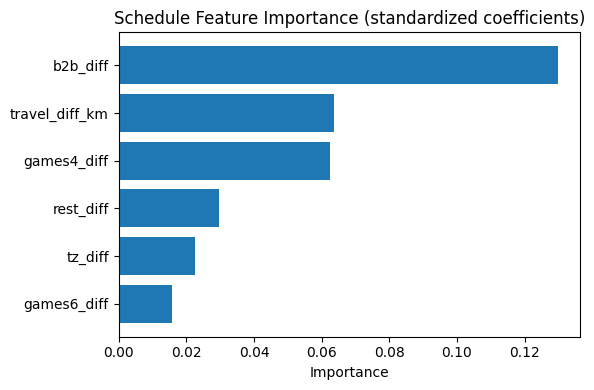

In [270]:
# plots
coefs = model.named_steps["lr"].coef_[0]
coef_df = pd.DataFrame({"feature": features, "coef": coefs, "abs_coef": np.abs(coefs)})
sched_only = coef_df[coef_df["feature"].isin(["rest_diff","b2b_diff","games4_diff","games6_diff","travel_diff_km","tz_diff"])]\
             .sort_values("abs_coef")

plt.figure(figsize=(6, 4))
plt.barh(sched_only["feature"], sched_only["abs_coef"])
plt.title("Schedule Feature Importance (standardized coefficients)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

I predict a team’s chance to win each game using Logistic Regression. I feed the model who’s at home, how strong the team is compared to its opponent that season (net rating difference), and schedule advantages like extra rest, back-to-backs, how many games each side played in the last 4/6 nights, travel since the previous game, and time-zone changes. I standardize these inputs so they’re on the same scale, train the model, then run a counterfactual where I zero-out the schedule differences to see how much the schedule alone changes win probability. That per-game change, summed by team, gives my estimate of wins added or lost due to the schedule. Below is a quick diagnostic that prints test metrics and shows which factors matter most.